# **Movie Recomendation System with MovieLen**
### *Iñigo Peña*

## Importing Dependencies

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Exploratory Data Analysis**

In [242]:
#Rating data
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [243]:
# Users data
users = pd.read_csv('ml-1m/users.dat', sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [244]:
# Movies data
movies = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [245]:
n_ratings = len(ratings)
n_movies = ratings['MovieID'].nunique()
n_users = ratings['UserID'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 1000209
Number of unique movieId's: 3706
Number of unique users: 6040
Average number of ratings per user: 165.6
Average number of ratings per movie: 269.89


## - Search for inconsistencies between datasets

In [246]:
unique_moives_in_ratings = set(ratings['MovieID'].unique())
unique_movies = set(movies['MovieID'].unique())

invalid_movie_ids = unique_moives_in_ratings - unique_movies

print("Invalid MovieIDs (present in ratings but not in movies):")
print(invalid_movie_ids if len(invalid_movie_ids) > 0 else "None")
print(f"\nNumber of invalid MovieIDs: {len(invalid_movie_ids)}")

Invalid MovieIDs (present in ratings but not in movies):
None

Number of invalid MovieIDs: 0


In [247]:
unique_users_in_ratings = set(ratings['UserID'].unique())
unique_users = set(users['UserID'].unique())

invalid_user_ids = unique_users_in_ratings - unique_users

print("Invalid UserIDs (present in ratings but not in users):")
print(invalid_user_ids if len(invalid_user_ids) > 0 else "None")
print(f"\nNumber of invalid UserIDs: {len(invalid_user_ids)}")

Invalid UserIDs (present in ratings but not in users):
None

Number of invalid UserIDs: 0


In [265]:
print('Unique movie IDs: ', len(movies['MovieID'].unique()))
print('Unique movie titles: ', len(movies['Title'].unique()))

Unique movie IDs:  3883
Unique movie titles:  3841


## - Search for missing ratings

In [253]:
# User-item interaction matrix
user_item_matrix = ratings.pivot(index='UserID', columns='MovieID', values='Rating')

user_item_matrix.iloc[:5, :10]

MovieID,1,2,3,4,5,6,7,8,9,10
UserID,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


In [254]:
missing_ratings_count = user_item_matrix.isna().sum().sum()
print(f"Total missing ratings: {missing_ratings_count}")

Total missing ratings: 21384031


In [255]:
total_cells = user_item_matrix.size
missing_percentage = (missing_ratings_count / total_cells) * 100
print(f"Missing ratings (%): {missing_percentage:.2f}%")

Missing ratings (%): 95.53%


## - Distribution of movie ratings

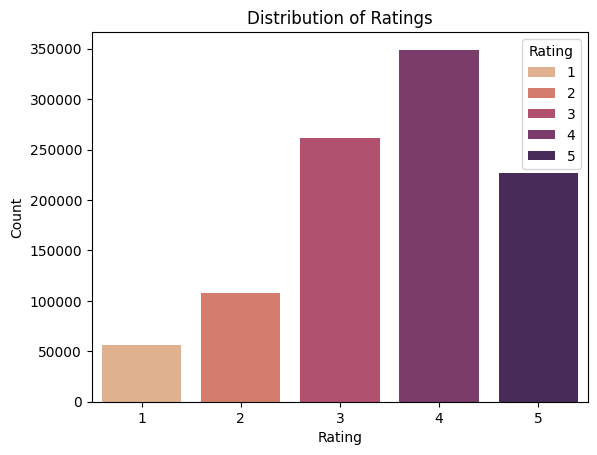

In [256]:
rating_counts = ratings['Rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='flare')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## - Most and least rated movies

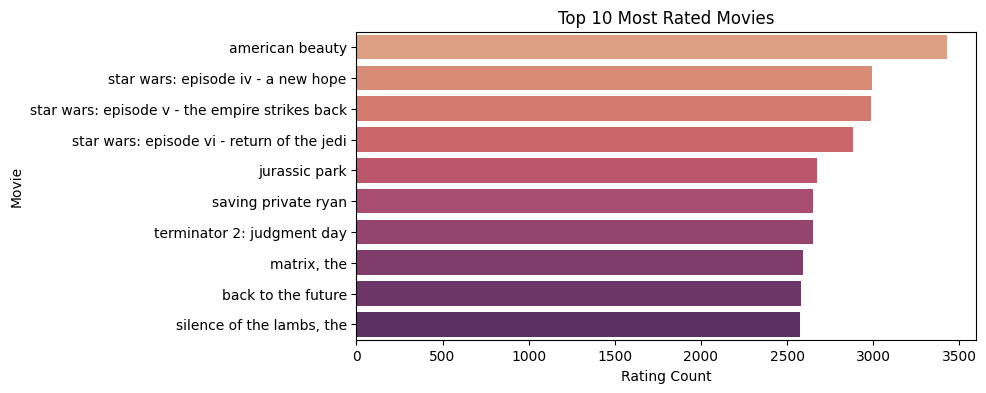

In [257]:
# Most rated movies
most_rated_movies = ratings['MovieID'].value_counts()[:10]
most_rated_movies = pd.DataFrame({'MovieID': most_rated_movies.index, 'RatingCount': most_rated_movies.values})
most_rated_movies = pd.merge(most_rated_movies, movies, on='MovieID')
most_rated_movies = most_rated_movies[['Title', 'RatingCount']]

plt.figure(figsize=(8, 4))
sns.barplot(x='RatingCount', y='Title', data=most_rated_movies, hue='Title', palette='flare')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Rating Count')
plt.ylabel('Movie')
plt.show()

In [258]:
# Least rated movies
least_rated_movies = ratings['MovieID'].value_counts().sort_values()[:5]
least_rated_movies = pd.DataFrame({'MovieID': least_rated_movies.index, 'RatingCount': least_rated_movies.values})
least_rated_movies = pd.merge(least_rated_movies, movies, on='MovieID')
least_rated_movies = least_rated_movies[['Title', 'RatingCount']]

least_rated_movies

,Title,RatingCount
0,"five wives, three secretaries and me",1
1,one little indian,1
2,white boys,1
3,broken vessels,1
4,aiqing wansui,1


 ## - Most and least active users

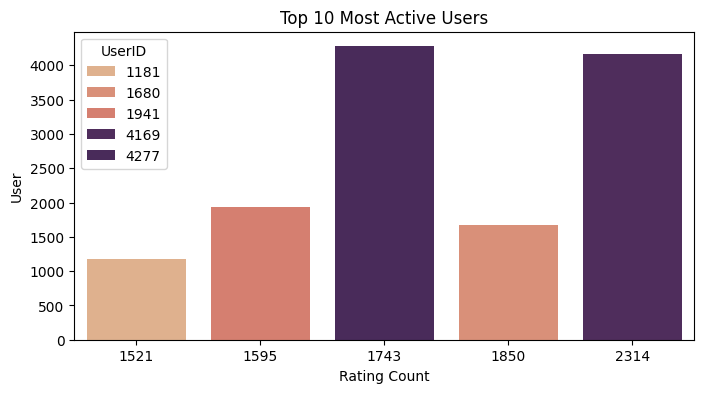

In [259]:
# Most active users
most_active_users = ratings['UserID'].value_counts()[:5]
most_active_users = pd.DataFrame({'UserID': most_active_users.index, 'RatingCount': most_active_users.values})
most_active_users = pd.merge(most_active_users, users, on='UserID')
most_active_users = most_active_users[['UserID', 'RatingCount']]

plt.figure(figsize=(8, 4))
sns.barplot(x='RatingCount', y='UserID', data=most_active_users, hue='UserID', palette='flare')
plt.title('Top 10 Most Active Users')
plt.xlabel('Rating Count')
plt.ylabel('User')
plt.show()

In [260]:
# Least active users
least_active_users = ratings['UserID'].value_counts().sort_values()[:5]
least_active_users = pd.DataFrame({'UserID': least_active_users.index, 'RatingCount': least_active_users.values})
least_active_users = pd.merge(least_active_users, users, on='UserID')
least_active_users = least_active_users[['UserID', 'RatingCount']]

least_active_users

,UserID,RatingCount
0,2930,20
1,2819,20
2,2884,20
3,217,20
4,5725,20


## - Best and worst rated movies

In [261]:
# Best rated movies and rating count
movie_ratings = ratings.groupby('MovieID')['Rating'].agg(['mean', 'count'])
movie_ratings = movie_ratings.sort_values(by='mean', ascending=False)
movie_ratings = pd.merge(movie_ratings, movies, on='MovieID')
movie_ratings = movie_ratings[['Title', 'mean', 'count']]
filtered_movies = movie_ratings[(movie_ratings['count'] > 260) & (movie_ratings['mean'] > 4.5)]

filtered_movies

,Title,mean,count
14,seven samurai (the magnificent seven) (shichin...,4.560510,628
15,"shawshank redemption, the",4.554558,2227
16,"godfather, the",4.524966,2223
17,"close shave, a",4.520548,657
18,"usual suspects, the",4.517106,1783
19,schindler's list,4.510417,2304
20,"wrong trousers, the",4.507937,882


In [262]:
# Worst rated movies and rating count
movie_ratings = movie_ratings.sort_values(by='mean')
movie_ratings[(movie_ratings['count'] > 260) & (movie_ratings['mean'] < 2.0)]

,Title,mean,count
3648,battlefield earth,1.611111,342
3580,speed 2: cruise control,1.871935,367
3578,super mario bros.,1.874286,350
3574,superman iv: the quest for peace,1.888554,332
3554,grease 2,1.963696,303
3547,"avengers, the",1.996528,288


# Types of Recommendation Engines
## 1. Content-Based
The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it's easy to determine the context/properties of each item.

A content based recommender works with data that the user provides, either explicitly movie ratings for the MovieLens dataset. Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

## 2. Collaborative Filtering
The Collaborative Filtering Recommender is entirely based on the past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes and choices of two users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that.

For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie 1. This makes it one of the most commonly used algorithm as it is not dependent on any additional information.

In general, collaborative filtering is the workhorse of recommender engines. The algorithm has a very interesting property of being able to do feature learning on its own, which means that it can start to learn for itself what features to use. It can be divided into Memory-Based Collaborative Filtering and Model-Based Collaborative filtering. In this post, I'll only focus on the Memory-Based Collaborative Filtering technique.

## Implementation
With all that theory in mind, I am going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file movies.csv.



# 4- Model
The steps in the model are as follows:

1- Map user ID to a "user vector" via an embedding matrix

2- Map movie ID to a "movie vector" via an embedding matrix

3- Scale down the initial weights of the embedding layers

4- Compute the dot product between the user vector and movie vector, to obtain the a match score between the user and the movie (predicted rating).

5- Train the embeddings via gradient descent using all known user-movie pairs.

This example demonstrates Collaborative filtering using the Movielens dataset to recommend movies to users. The MovieLens ratings dataset lists the ratings given by a set of users to a set of movies. Our goal is to be able to predict ratings for movies a user has not yet watched. The movies with the highest predicted ratings can then be recommended to the user.

Puedo pedirle a chatgpt actores y cosas sobre las peliculas como metadata para hacer un content based filtering

https://chatgpt.com/c/67ddb5a0-1b7c-8004-be4d-10beedd0b285

Github solving:
https://github.com/rposhala/Recommender-System-on-MovieLens-dataset/blob/main/README.md#content-based-recommender-system

En drive hay un collab de collavorative filtering y un doc con los pasos

https://www.youtube.com/watch?v=e6kcs9Uj_ps


FROM HERE THE CONTENT BASED:

https://github.com/khanhnamle1994/movielens/blob/master/Content_Based_and_Collaborative_Filtering_Models.ipynb

## FROM HERE THE DNN MODEL:

https://github.com/rposhala/Recommender-System-on-MovieLens-dataset/blob/main/Recommender_System_using_Softmax_DNN.ipynb

PERO OJO A ESTE COLLABORATIVE FILTERING:

https://www.kaggle.com/code/sachinsarkar/movielens-movie-recommendation-system

In [ ]:
/movie_recommendation_project
│── main.ipynb               # Jupyter notebook for testing/training models
│── data_preprocessing.py     # All preprocessing steps (used by both models)
│── collaborative_filtering.py  # CF model implementation
│── content_based.py          # Content-based model implementation
│── evaluation.py             # Functions to evaluate both models
│── utils.py                  # Helper functions (e.g., data loading, similarity metrics)
│── /data                     # Raw & preprocessed datasets
│── /models                   # Saved trained models
│── /results                  # Output files, logs, plots

CF: Recommendation System using Collaborative Filtering

This Recommendation System will works like "people who watching and like this movie also watch and like that movies".

Why Use Embeddings?

Instead of representing users and movies as one-hot encoded vectors (which are sparse and high-dimensional), embeddings map them to a lower-dimensional space where similar users/movies have closer vector representations.

A loss function (e.g., Mean Squared Error for rating prediction or Binary Cross-Entropy for implicit feedback) is used to update these embeddings during training


Why Initialize Weights?

Prevent Exploding or Vanishing Gradients

Large initial values can lead to large activations, making gradients explode during backpropagation.

Very small initial values (too close to zero) can lead to vanishing gradients, preventing learning.

Why separate the project in .py files and not do a ipynb

Regression problems: Single output neuron for continuous values (e.g., predicting house prices).

Classification problems: One neuron per class (e.g., binary or multi-class classification).

Regression: 1 neuron, linear activation.

Binary Classification: 1 neuron, sigmoid activation.

Multi-Class Classification: Multiple neurons, softmax activation.


The Softmax function transforms the output values into probabilities.

It ensures that:

All outputs are positive.

They sum to 1 (making them interpretable as class probabilities).

dim=1 applies softmax along the second dimension (batch dimension).